In [89]:
#inporting required modules
import torch
import numpy as np
import matplotlib.pyplot as plt

#Activation Function
###We used sigmoid as our activation function i.e to make sure that our perceptron holds a value between 0 and 1

In [90]:
#writing our activation function
def sigmoid(x):
  return 1/(1+torch.exp(-x))

#Writing a function which helps us calculate gradient
def gradient(x1,s1,y):
  return 4 * ((x1-y)**3) * (torch.exp(-x1)/(1+torch.exp(-x1))**2)

#DataSet generation
###We use a similar to method to generate our data as used in problem 1

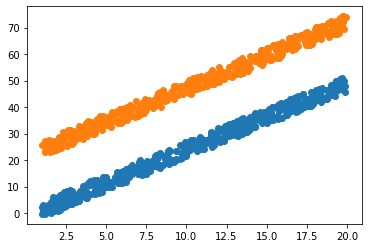

In [91]:
D1 = torch.empty(500,2).fill_(1)
D2 = torch.empty(500,2).fill_(1)

gamma = 20 ##Measure of Linear separatibilty

D3 = torch.FloatTensor(500,1).uniform_(1,20)
D4 = torch.FloatTensor(500,1).uniform_(1,20)
Y3 = 2.5*D3 + 0
Y4 = 2.5*D4 + gamma
Y3 = Y3 + torch.FloatTensor(500,1).uniform_(-4,2)
Y4  =Y4 + torch.FloatTensor(500,1).uniform_(-1,5)

D1[:,0] = D3[:,0]
D1[:,1] = Y3[:,0]

D2[:,0] = D4[:,0]
D2[:,1] = Y4[:,0]

plt.scatter(D3[:,0],Y3[:,0])
plt.scatter(D4[:,0],Y4[:,0])
plt.show()

###We combine the two datasets and  add bias here to the weight itself like in problem 1

In [92]:
#Adding the extra dimension to data to take care of bias
X = torch.empty(1000,D1.size(1)+1).fill_(1)
X[::2,:2] = D1
X[1::2,:2] = D2

#Creating the labels
Y = torch.empty(1000,1)
Y[::2,:2] = 1
Y[1::2,:2] = 0

#Drawing graph with classifier before training.

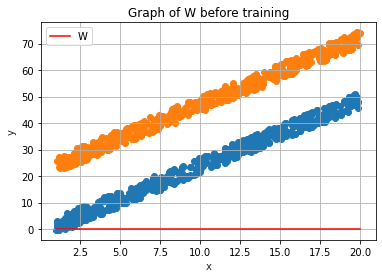

In [93]:
x = np.linspace(1,20,100)
y = np.zeros(100,) 
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.grid()
plt.show()

#Perceptron training function
###Here we use Stochastic Gradient Descent to update the weights and biases.

In [94]:
def train_perceptron(W,n_iters,learning_rate,X,y):
  iters = 0
  for _ in range(n_iters):
    number_of_changes = 0
    for idx, x_i in enumerate(X):
      s1 = x_i.dot(W)
      x1 = sigmoid(s1)
      
      #perceptron update
      gradient2 = gradient(x1,s1,y[idx])
      W = W - (learning_rate)*gradient2*x_i

  return W

#Parameter Initialization

In [95]:
n_samples, n_features = X.shape
W = torch.rand(n_features)
bias = 0
n_iters = 100
learning_rate = 0.001

#Calling the train_perceptron Function


In [96]:
W = train_perceptron(W,n_iters,learning_rate, X, Y)

In [97]:
#Printing weights and biases
print(W)

tensor([ 0.9433, -0.2913,  0.2915])


#Graph after training.

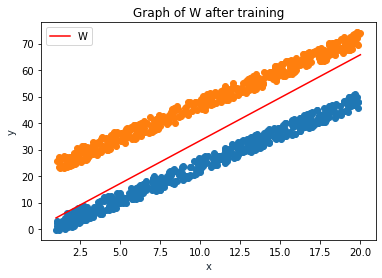

In [98]:
x = np.linspace(1,20,100)
y1 = -(W[0].item()/W[1].item())*x - (W[2].item()/W[1].item())
plt.plot(x, y1, '-r', label='W')
plt.title('Graph of W after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(D1[:,0], D1[:,1])
plt.scatter(D2[:,0], D2[:,1])
plt.show()
